In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

number of datapoints: 324
First step: 78
mean and variance of background: 2703 and 64216
mean and variance of single fluorophore: 1296 and 200122


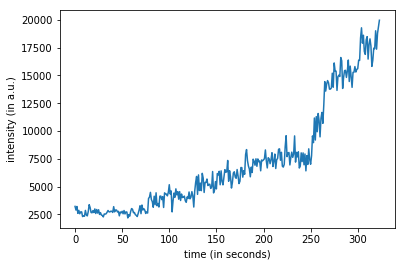

In [15]:
#We import the Kalafut-Visscher algorithm
from KalafutPUB import KalafutC
#We import some data:
zignal = np.loadtxt("test.txt", unpack=True)  
#This is real experimental data from the lab of Y.Krishnan at U. Chicago. 
#This means we have no idea where the steps actually are.
#We reverse the plot here; see part 4 below for the reason.
signal = zignal[::-1]
Try1 = KalafutC(signal)
stats = Try1.stats
tzero = Try1.tzero

print ("number of datapoints:",len(signal))
print ("First step:", tzero)
print ("mean and variance of background:", int(stats[0]),"and",int(stats[1]))
print ("mean and variance of single fluorophore:", int(stats[2]),"and",int(stats[3]))


#%matplotlib inline
#import matplotlib.pyplot as plt
plt.plot(signal)
plt.xlabel('time (in seconds)')
plt.ylabel('intensity (in a.u.)')
plt.show()

In [16]:
mb = np.mean(signal[10:50])
vb = np.var(signal[10:50])
mf = np.mean(signal[120:200]) - mb
vf = np.var(signal[120:200]) - vb
print ("mean and variance of background:", int(mb),"and",int(vb))
print ("mean and variance of single fluorophore:", int(mf),"and",int(vf))

mean and variance of background: 2697 and 53530
mean and variance of single fluorophore: 3152 and 1050316


In [60]:
from SeekerPUB import Slicer

#We pass into the precursor algorithm the data, window size, the number of fluorophores the reversed trace starts with 
#(0, since all have photobleached) and the statistics found by Kalafut-Visscher above.
#Note that the number of data points must always be an integer multiple of the window size (windsz)
windsz = 54
Prelook = Slicer(signal,windsz,0,stats) 

#The precursor algorithm will now divide the 1200 data points by 100, and look into each of the resulting 12 windows.
#It will print "Step 2 'window number' " for each successfully processed window. 
#The 12 steps are numbered in the pythonic way, 0 to 11.

#Here is the approximate number of fluorophores active in each window:
print (Prelook.fosfor)

Step 2 0
Step 2 1
Step 2 2
Step 2 3
Step 2 4
Step 2 5
[  0.   1.   2.   2.   5.  10.]


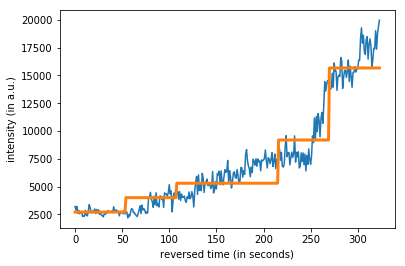

In [61]:
#We can use these to see an estimate of what the precursor algorithm thinks the data ought to look like without noise,
#and compare this to the actual data
precurs = np.zeros(len(signal))
for i in range(0,len(precurs),1):
    j = i//windsz
    precurs[i] = Prelook.fosfor[j]*stats[2] +stats[0] 

dx = np.arange(0,len(signal))
    
plt.figure(1)
plt.plot(dx, signal)
plt.plot(dx, precurs, linewidth=3.0)
plt.xlabel('reversed time (in seconds)')
plt.ylabel('intensity (in a.u.)')
plt.show()

In [62]:
print(stats)

[   2703.98717949   64216.55111769    1296.69282051  200122.38648231]


In [63]:
Prelook.fosfor[j]

10.0

In [64]:
dx = np.arange(0,len(signal))

In [65]:
from LeffFinderPUB import LbarFind, PriorSlicer
from SeekerPUB import mSICer

#This finds an array of estimates for the parameter λ. The main code then automatically chooses the best estimate
#to use. This parameter plays only a minor role and can be way off without repercussions to our method accuracy.
calba = LbarFind(signal, stats, tzero, 0)                                   
lbar = calba.Lbar                                                
zamm = PriorSlicer(signal, lbar, tzero, 0)   
lefaray = zamm.leffarray  

widd = int(len(signal)/windsz)

fluor = 0
stepsC = np.zeros(1)
for i in range(0,widd,1):
    mSIClook = mSICer(signal, i, fluor, windsz, stats, len(signal), lefaray)                                                                     
    steps_found = mSIClook.SIClocs                                            
    stepsCi = np.zeros_like(steps_found)
    levelz = fluor
    for j in range(0,len(steps_found),1):                                     
        stepsCi[j] = levelz
        levelz += steps_found[j]
    fluor = mSIClook.fluorOUT
    stepsC = np.concatenate((stepsC,stepsCi))  
stepsC = stepsC[1:]

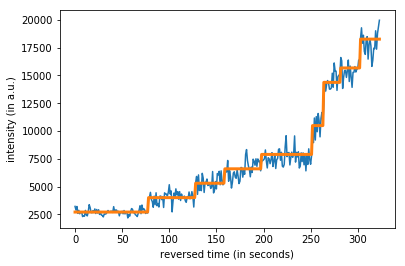

number of steps: 8
total fluorophores: 12


In [66]:
#We can now see the results of our effort:
result = np.zeros(len(signal))
for i in range(0,len(stepsC),1):
    result[i] = stepsC[i]*stats[2] +stats[0] 

plt.figure(1)
plt.plot(dx, signal)
plt.plot(dx, result, linewidth=3.0)
plt.xlabel('reversed time (in seconds)')
plt.ylabel('intensity (in a.u.)')
plt.show()

#We can also count the number of steps:
diffcount = np.diff(stepsC)
acount = np.where(diffcount!=0)
stepcount = len(acount[0])

print ("number of steps:", stepcount)
#and find what the maximum number of fluorophores that were ever active was:
maxfluors = np.nanmax(stepsC)
print ("total fluorophores:", int(maxfluors))

In [67]:
zignal = np.loadtxt("ya.txt", unpack=True)  

signal = zignal[::-1]


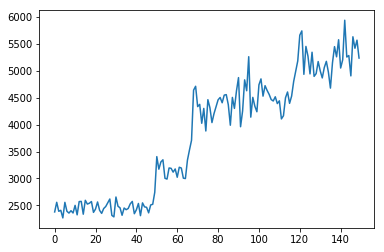

In [13]:
plt.plot(signal)
plt.show()

In [201]:
result =  np.loadtxt('UUU_found_steps.txt')

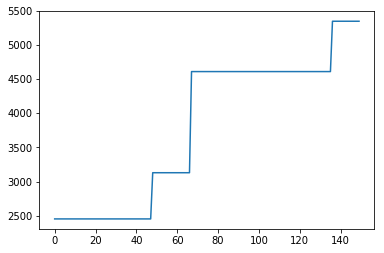

In [202]:
plt.plot(result)
plt.show()

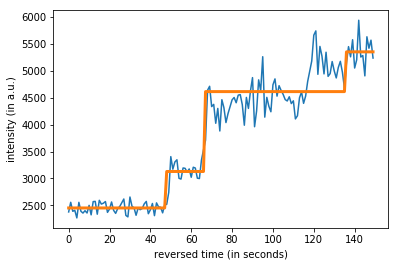

In [203]:
dx = np.arange(0,len(signal))
plt.figure(1)
plt.plot(dx, signal)
plt.plot(dx, result, linewidth=3.0)
plt.xlabel('reversed time (in seconds)')
plt.ylabel('intensity (in a.u.)')
plt.show()

Okay I think I got it to work.